# Outlier detection and removal using IQR - Feature Engineering - Day 11


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
922,7.68,23.0,1
952,7.71,25.0,1
835,6.67,65.0,1
508,6.41,14.0,1
759,6.55,22.0,1


C:\Users\panka\AppData\Local\Temp\ipykernel_5980\2535591610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

<Axes: xlabel='cgpa', ylabel='Density'>

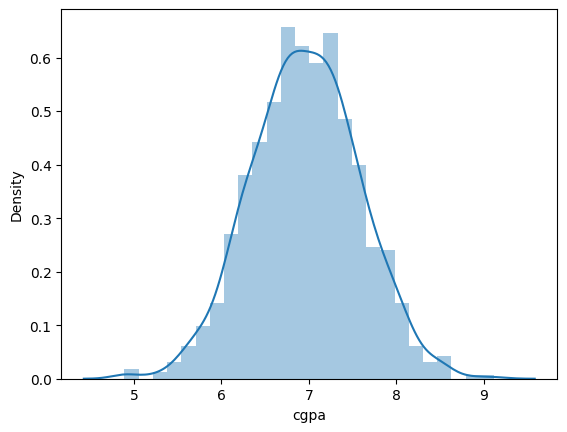

In [7]:
sns.distplot(df['cgpa'])

In [8]:
df['cgpa'].skew()

-0.014529938929314918

C:\Users\panka\AppData\Local\Temp\ipykernel_5980\3382675032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placed'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Axes: xlabel='placed', ylabel='Density'>

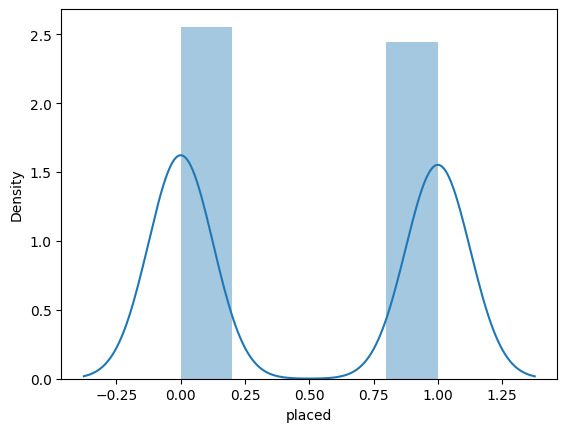

In [9]:
sns.distplot(df['placed'])

In [10]:
df['placed'].skew()

0.04407679462601847

C:\Users\panka\AppData\Local\Temp\ipykernel_5980\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

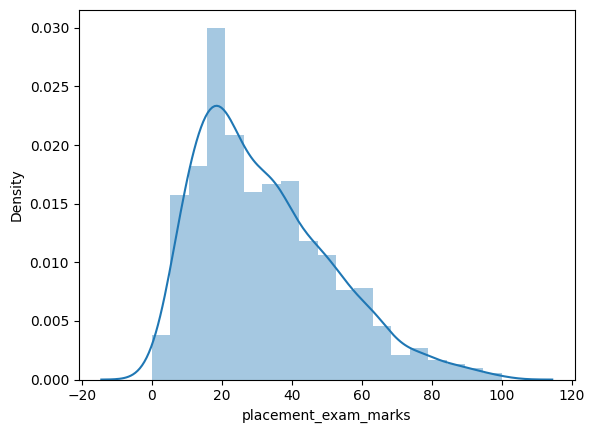

In [11]:
sns.distplot(df['placement_exam_marks'])

In [12]:
df['placement_exam_marks'].skew()

0.8356419499466834

<Axes: >

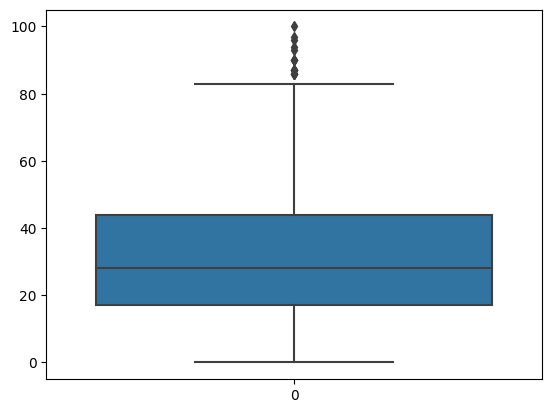

In [13]:
sns.boxplot(df['placement_exam_marks'])

In [16]:
# finding IQR

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [17]:
percentile25

17.0

In [18]:
percentile75

44.0

In [20]:
IQR = percentile75 - percentile25
IQR

27.0

In [21]:
upperlimit = percentile75 +(1.5 * IQR)
lowerlimit = percentile25 -(1.5 * IQR)

In [22]:
upperlimit

84.5

In [23]:
lowerlimit

-23.5

- outliers

In [24]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [26]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


- trimming

In [28]:
df0=df[df['placement_exam_marks']<upperlimit]

In [29]:
df0.shape

(985, 3)

C:\Users\panka\AppData\Local\Temp\ipykernel_5980\380060242.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

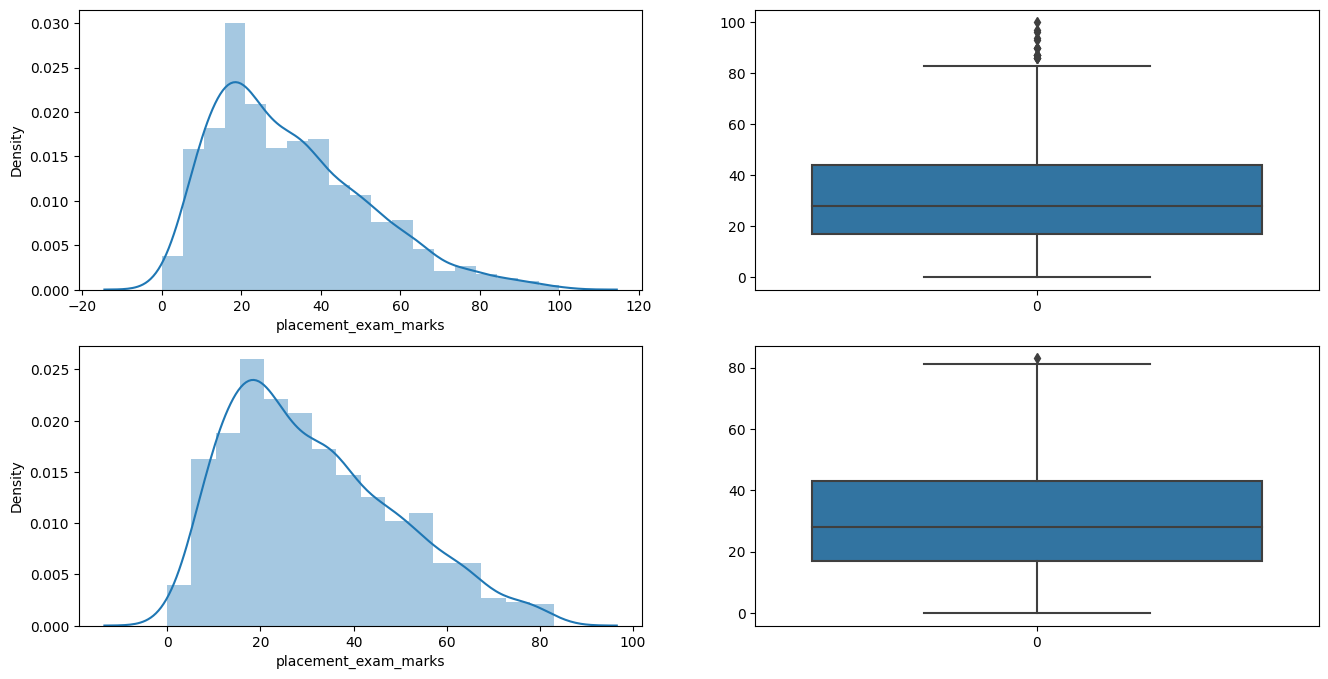

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df0['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df0['placement_exam_marks'])

plt.show()

- capping

In [31]:
df0_cap = df.copy()

df0_cap['placement_exam_marks'] = np.where(
    df0_cap['placement_exam_marks'] > upperlimit,
    upperlimit,
    np.where(
        df0_cap['placement_exam_marks'] < lowerlimit,
        lowerlimit,
        df0_cap['placement_exam_marks']
    )
)

In [32]:

df0.shape

(985, 3)

C:\Users\panka\AppData\Local\Temp\ipykernel_5980\2043111072.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

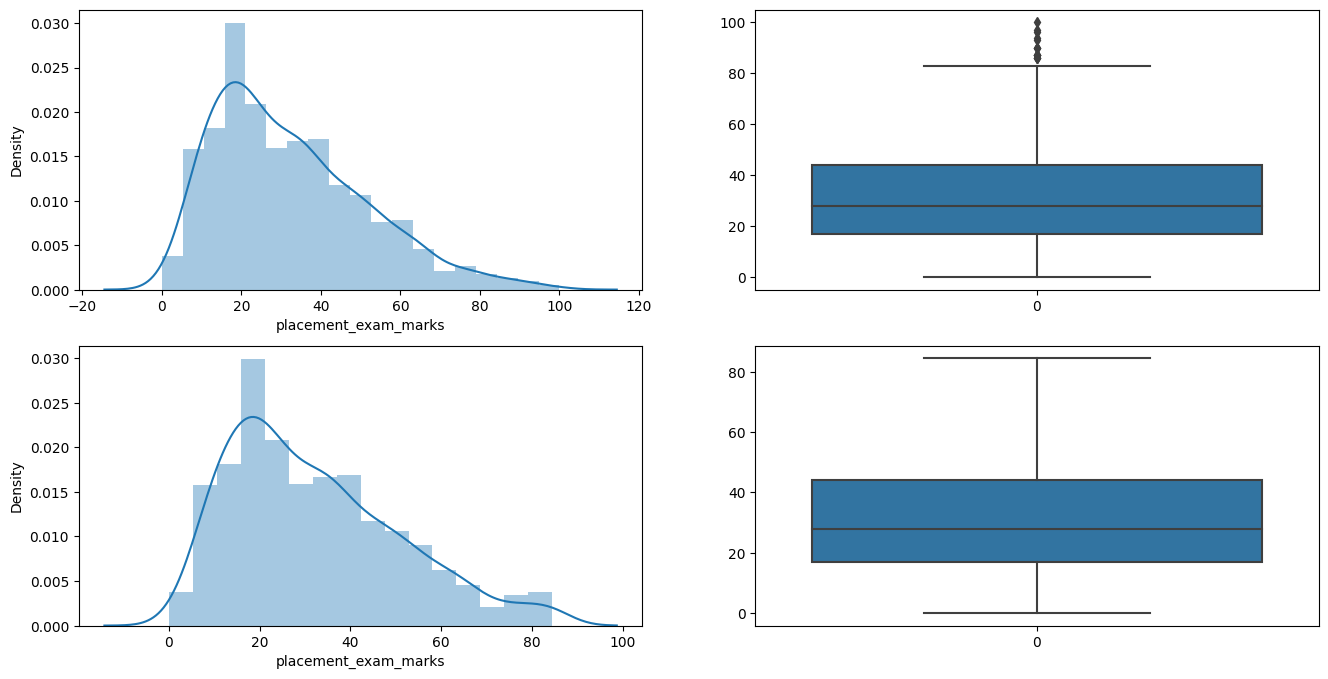

In [33]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df0_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df0_cap['placement_exam_marks'])

plt.show()